<!DOCTYPE html>
<html lang="pt">
<head>
    <meta charset="UTF-8">
    <title>Projecto TITANIC</title>
    <style>
        h1 {
            color: #3399FF;
            text-align: center;
        }
        ul {
            list-style-type: none;
        }
        ul li {
            color: lightblue;
        }
        ul ul li {
            color: goldenrod;
        }
        .logo {
            float: right;
            width: 115px;
        }
        .header {
            text-align: center;
        }
    </style>
</head>
<body>
    <div class="header">
        <img src="https://img.icons8.com/officel/80/titanic.png" class="logo" alt="Navio">
        <h1>Projecto TITANIC</h1>
    </div>
    <ul>
        <li>OBJECTIVO:
            <ul>
                <li>Analisar e interpretar quais os tipos de pessoas mais propensas a sobreviver ao desastre do Titanic aplicando ferramentas e estratégias de previsão de quais os passageiros que sobreviveram.</li>
            </ul>
        </li>
        <li>ROADMAP:
            <ul>
                <li>Este plano de trabalho detalhado e estruturado envolverá várias etapas, desde análise exploratória dos dados até à sua modelagem preditiva.</li>
            </ul>
        </li>
        <li>VARIÁVEL TARGET:
            <ul>
                <li>SURVIVED</li>
            </ul>
        </li>
    </ul>
</body>
</html>


## Integração e Análise Inicial

Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

#### Carregar o Dataset

In [2]:
dataset_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(dataset_url)

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Número de linhas e colunas do dataset

In [4]:
data.shape

(891, 12)

Vamos verificar valores nulos no dataset

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

E os tipos de dados...

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Estatísticas descritivas das variáveis numéricas

In [7]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## Limpeza e Transformação de Dados

Reparámos que existem valores ausentes na coluna 'Age' portanto vamos substítui-los pela mediana

In [9]:
# Substituir os valores nulos pela mediana
data['Age'].fillna(data['Age'].median(), inplace=True)

Agora como apenas temos 2 valores nulos na coluna 'Embarked', vamos eliminar essas linhas

In [10]:
# Remover linhas onde 'Embarked' tem valores nulos
data = data.dropna(subset=['Embarked'])

Vamos também susbituir os valores nulos na coluna 'Cabin' 

In [11]:
data['Cabin'].fillna('Unknown', inplace=True)

C:\Users\sergio\AppData\Local\Temp\ipykernel_21888\1029081825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'].fillna('Unknown', inplace=True)


In [12]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Neste momento, já tratámos os valores ausentes conforme verificamos em cima

De seguida, vamos passar as variáveis categóricas da coluna 'Sex' para valores numéricos.

In [13]:
# Transformar a variável 'Sex' em valores numéricos
data['Sex'] = data['Sex'].replace({'male': 0, 'female': 1})
data

C:\Users\sergio\AppData\Local\Temp\ipykernel_21888\750255611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = data['Sex'].replace({'male': 0, 'female': 1})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


Codificar Embarked em variáveis binárias utilizando One-Hot Encoding.

In [14]:
# Realizar One-Hot Encoding na coluna 'Embarked'
data = pd.get_dummies(data, columns=['Embarked'], prefix='Embarked')

In [15]:
data['Embarked_C'] = data['Embarked_C'].astype(int)
data['Embarked_Q'] = data['Embarked_Q'].astype(int)
data['Embarked_S'] = data['Embarked_S'].astype(int)

In [16]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,Unknown,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,Unknown,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,0,0


Criar uma nova variável com a soma de SibSp e Parch

In [17]:
# Criar a nova coluna FamilySize como a soma de SibSp e Parch
data['FamilySize'] = data['SibSp'] + data['Parch']

In [18]:
# Criar a coluna IsAlone: 1 se FamilySize for 0, 0 caso contrário
data['IsAlone'] = (data['FamilySize'] == 0).astype(int)

In [19]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,0,0,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,Unknown,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,0,1,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,Unknown,0,0,1,3,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,0,0,0,1


## Análise Exploratória e Visualizações

Vamos visualizar a distribuição de variáveis Age, Fare e FamilySize usando histogramas para representar a distribuição

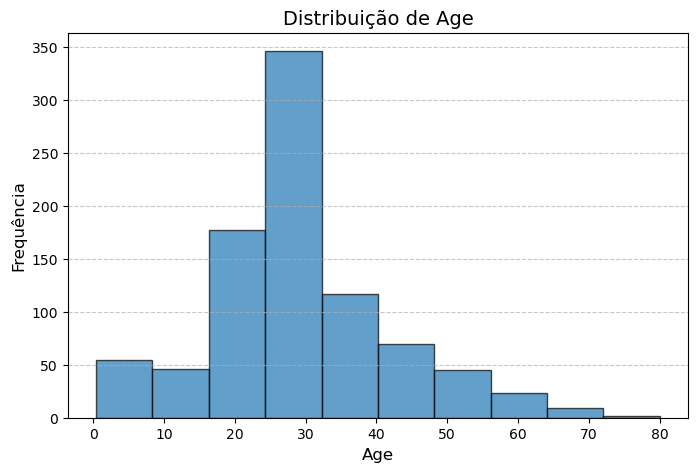

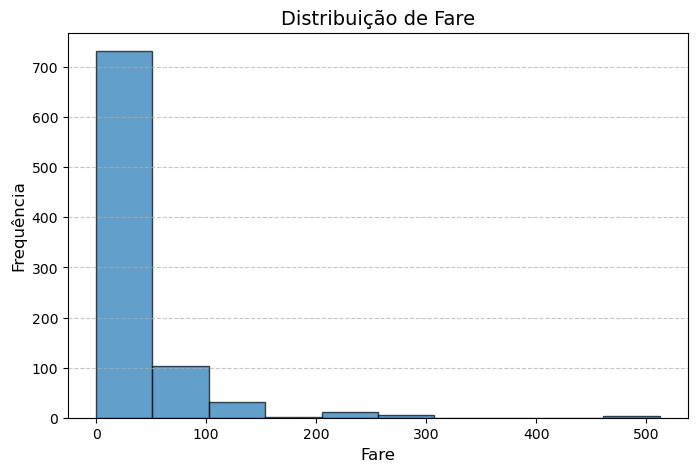

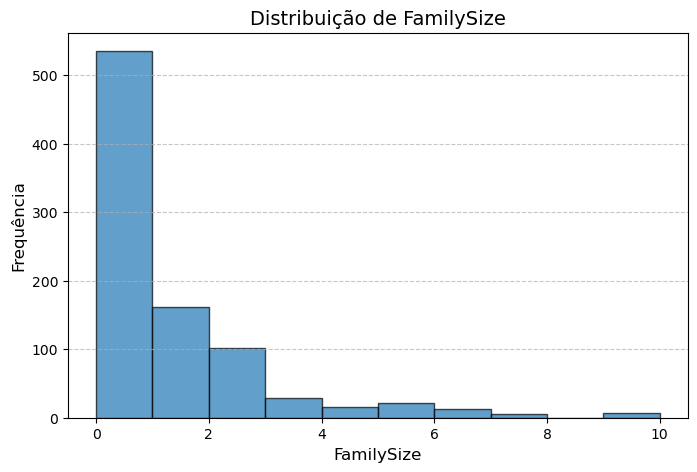

In [20]:
# Configurar os histogramas
columns_to_plot = ['Age', 'Fare', 'FamilySize']
for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    plt.hist(data[column], bins=10, edgecolor='k', alpha=0.7)
    plt.title(f'Distribuição de {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

#### Vamos analisar a relação entre variáveis e a sobrevivência

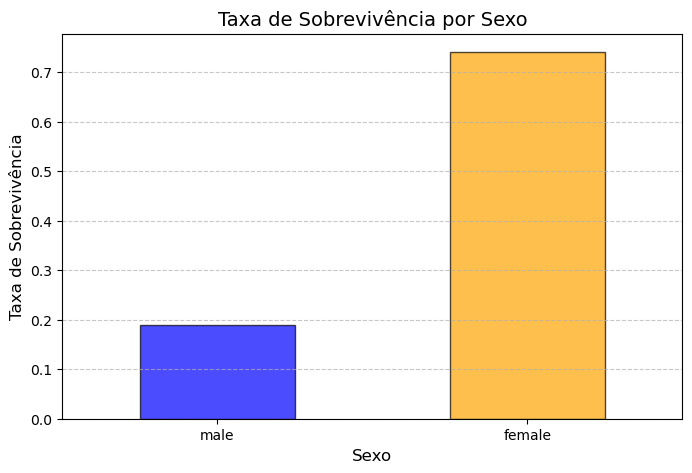

In [21]:
# Taxa de sobrevivência por Sex
survival_by_sex = data.groupby('Sex')['Survived'].mean()
survival_by_sex.index = survival_by_sex.index.map({0: 'male', 1: 'female'})

# Gráfico: Taxa de sobrevivência por Sex
plt.figure(figsize=(8, 5))
survival_by_sex.plot(kind='bar', color=['blue', 'orange'], alpha=0.7, edgecolor='k')
plt.title('Taxa de Sobrevivência por Sexo', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Taxa de Sobrevivência', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Pelo gráfico podemos perceber que o género foi um factor muito importante na probablidade de sobrevivência.

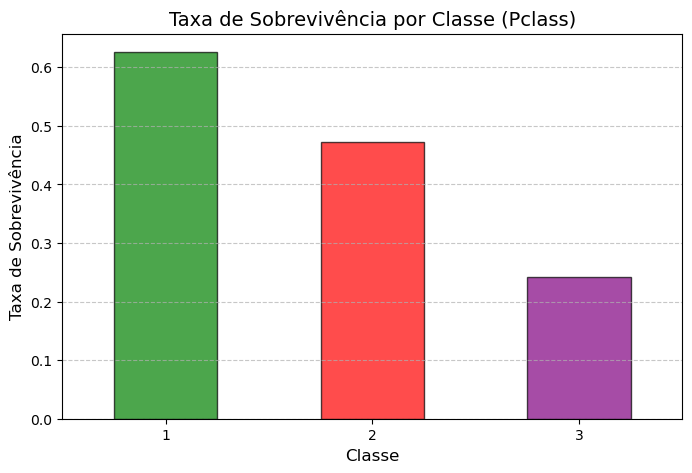

In [22]:
# Taxa de sobrevivência por Pclass
survival_by_pclass = data.groupby('Pclass')['Survived'].mean()

# Gráfico: Taxa de sobrevivência por Pclass
plt.figure(figsize=(8, 5))
survival_by_pclass.plot(kind='bar', color=['green', 'red', 'purple'], alpha=0.7, edgecolor='k')
plt.title('Taxa de Sobrevivência por Classe (Pclass)', fontsize=14)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Taxa de Sobrevivência', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Não tão acentuado mas também importante, foi a classe económica dos passageiros. Sendo que quem ia em 1ª classe ia no andar mais elevado do navio.

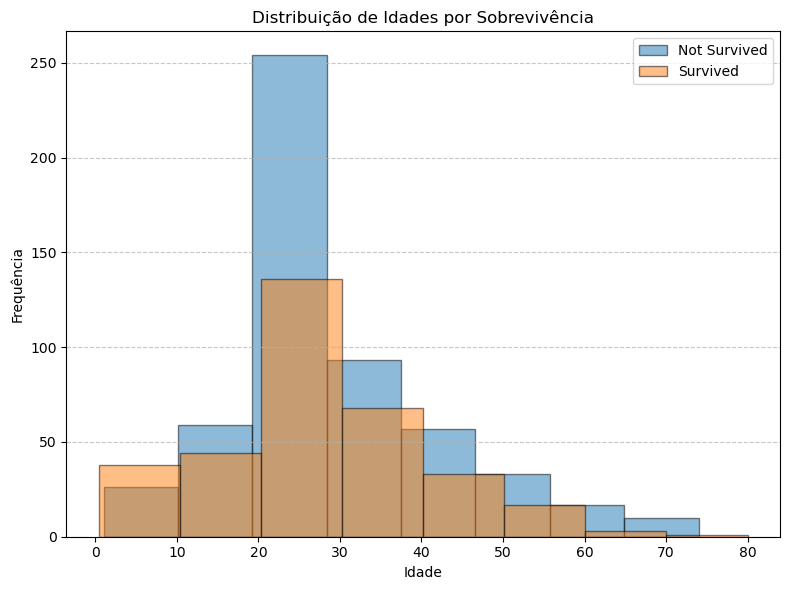

In [23]:
#Distribuição de idades por sobrevivência (histograma)
plt.figure(figsize=(8, 6))
for survived in [0, 1]:
    subset = data[data['Survived'] == survived]
    plt.hist(subset['Age'], bins=8, alpha=0.5, label=f"Survived = {survived}", edgecolor='k')

plt.title("Distribuição de Idades por Sobrevivência")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.legend(labels=['Not Survived', 'Survived'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Vamos criar um heatmap para explorar as correlações entre variáveis numéricas

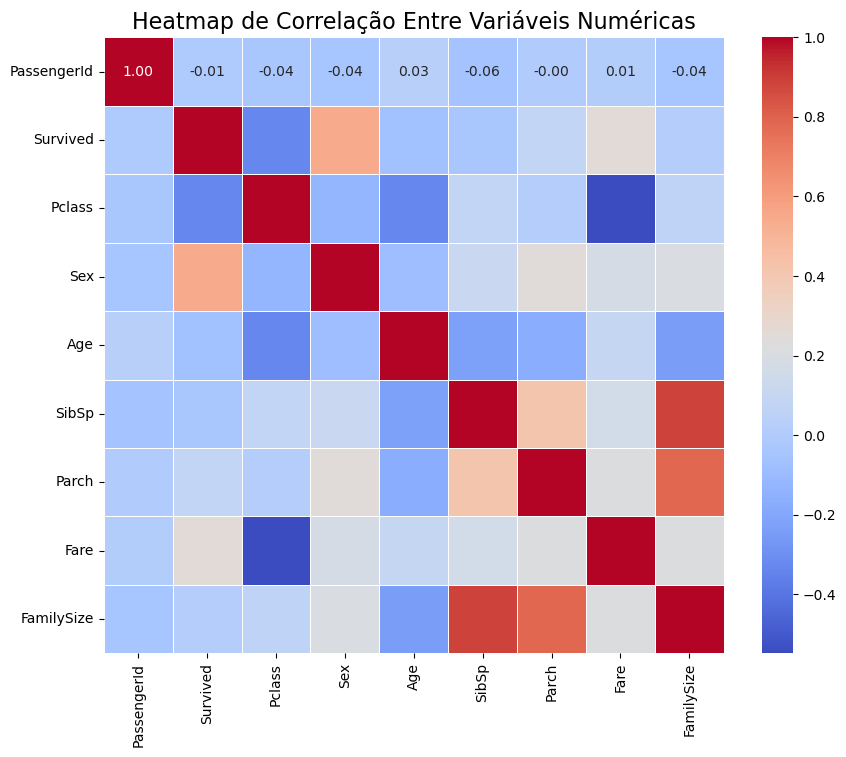

In [24]:
# Selecionar apenas as variáveis numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calcular as correlações entre variáveis numéricas
correlation_matrix = numeric_data.corr()

# Criar o heatmap com Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlação Entre Variáveis Numéricas', fontsize=16)
plt.show()

## Modelação e Comparação de Modelos

#### Dividir os dados em conjuntos de treino e teste

In [25]:
# Separar variáveis independentes (X) e dependente (y)
X = data.drop(columns=['Survived'])
y = data['Survived']

# Remover colunas irrelevantes tipo strings.
irrelevant_cols = ['Name', 'Ticket', 'Cabin', 'PassengerId', 'Parch', 'SibSp']
X = X.drop(columns=irrelevant_cols, errors='ignore')

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar um modelo (Random Forest neste caso)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Avaliar a importância das características
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print("Importância das Características:")
print(feature_importance.sort_values(by='Importance', ascending=False).round(2))

Importância das Características:
      Feature  Importance
3        Fare        0.27
1         Sex        0.26
2         Age        0.25
0      Pclass        0.09
7  FamilySize        0.07
6  Embarked_S        0.02
8     IsAlone        0.02
4  Embarked_C        0.01
5  Embarked_Q        0.01


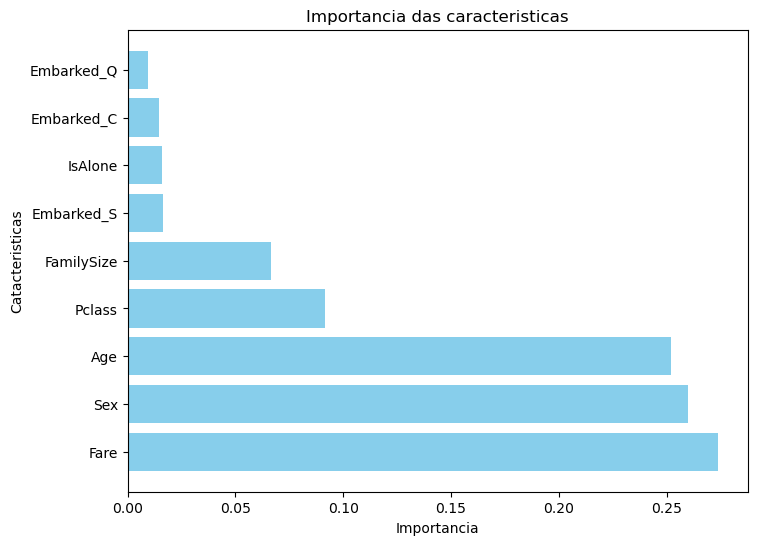

In [26]:
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(8,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title("Importancia das caracteristicas")
plt.xlabel("Importancia")
plt.ylabel("Catacteristicas")
plt.show()

### Implementar os modelos preditivos para prever a variável Survived

#### Árvore de Decisão

In [27]:
# Modelo de Árvore de Decisão
tree_model = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_model.fit(X_train, y_train)

# Fazer previsões
y_pred_tree = tree_model.predict(X_test)

# Avaliar o modelo
print("Decision Tree - Resultados:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree).round(2))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree - Resultados:
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       167
           1       0.77      0.72      0.74       100

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267

Confusion Matrix:
 [[145  22]
 [ 28  72]]


In [28]:
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros a testar
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Configurar o Grid Search
grid_search_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,  # Número de folds na validação cruzada
    scoring='accuracy'
)

# Ajustar o modelo
grid_search_tree.fit(X_train, y_train)

# Resultados
print("Melhores Hiperparâmetros:", grid_search_tree.best_params_)
print("Melhor Accuracy:", grid_search_tree.best_score_.round(2))

# Após o Grid Search
best_tree_model = grid_search_tree.best_estimator_



Melhores Hiperparâmetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Melhor Accuracy: 0.83


In [29]:
# Fazer previsões
y_pred_tree = best_tree_model.predict(X_test)

# Avaliar o modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Decision Tree com Grid Search - Resultados:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree).round(2))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree com Grid Search - Resultados:
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       167
           1       0.74      0.71      0.72       100

    accuracy                           0.80       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267

Confusion Matrix:
 [[142  25]
 [ 29  71]]


### KNN

In [30]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_knn = knn_model.predict(X_test_scaled)

# Avaliar o modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN - Precisão: {accuracy_knn:.2f}")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))


KNN - Precisão: 0.78
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       167
           1       0.71      0.69      0.70       100

    accuracy                           0.78       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267

[[139  28]
 [ 31  69]]


In [31]:
# Definir os parâmetros para o Grid Search no KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Número de vizinhos
    'weights': ['uniform', 'distance'],  # Pesos nos vizinhos
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Métricas de distância
}

# Configurar o Grid Search para KNN
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=5,  # Número de folds na validação cruzada
    scoring='accuracy',
    return_train_score=True
)

# Ajustar o Grid Search aos dados
grid_search_knn.fit(X_train_scaled, y_train)  # Certifica-te de que os dados estão normalizados

# Obter os melhores hiperparâmetros e a melhor acurácia
best_knn_model = grid_search_knn.best_estimator_
print("Melhores Hiperparâmetros:", grid_search_knn.best_params_)
print("Melhor Acurácia durante o Grid Search:", grid_search_knn.best_score_)


Melhores Hiperparâmetros: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Melhor Acurácia durante o Grid Search: 0.836025806451613


In [32]:
# Fazer previsões no conjunto de teste
y_pred_knn = best_knn_model.predict(X_test_scaled)

# Avaliar o desempenho do modelo
print("KNN - Resultados com Grid Search:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn).round(2))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN - Resultados com Grid Search:
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       167
           1       0.69      0.68      0.68       100

    accuracy                           0.76       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.76      0.76      0.76       267

Confusion Matrix:
 [[136  31]
 [ 32  68]]


### Vamos comparar os resultados dos modelos num gráfico, identificando o melhor modelo

In [33]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)

# KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)


In [34]:
import pandas as pd

# Criar a tabela comparativa
metrics_comparison = pd.DataFrame({
    "Metric": ["Accuracy", "F1-Score", "Precision", "Recall"],
    "Decision Tree": [accuracy_tree, f1_tree, precision_tree, recall_tree],
    "KNN": [accuracy_knn, f1_knn, precision_knn, recall_knn]
})

print(metrics_comparison)


      Metric  Decision Tree       KNN
0   Accuracy       0.797753  0.764045
1   F1-Score       0.724490  0.683417
2  Precision       0.739583  0.686869
3     Recall       0.710000  0.680000


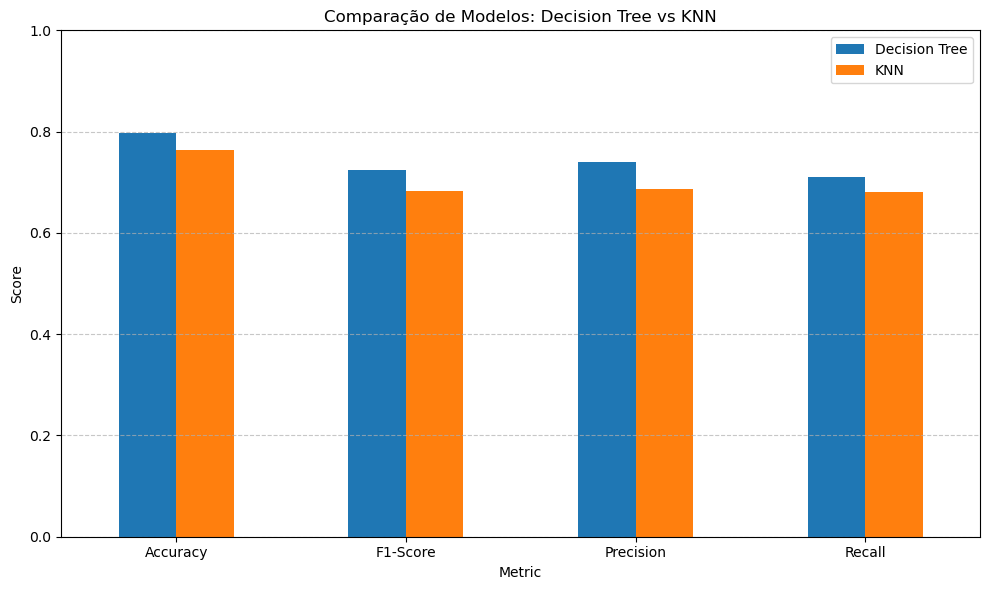

In [35]:
import matplotlib.pyplot as plt

# Configurar o gráfico
metrics_comparison.set_index("Metric").plot(kind="bar", figsize=(10, 6))
plt.title("Comparação de Modelos: Decision Tree vs KNN")
plt.ylabel("Score")
plt.ylim(0, 1) 
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


### Percebendo que a Árvore de Decisão teve os melhores resultados, vamos visualizar de forma a tirar algumas conclusões

Tree Accuracy:  0.8127340823970037


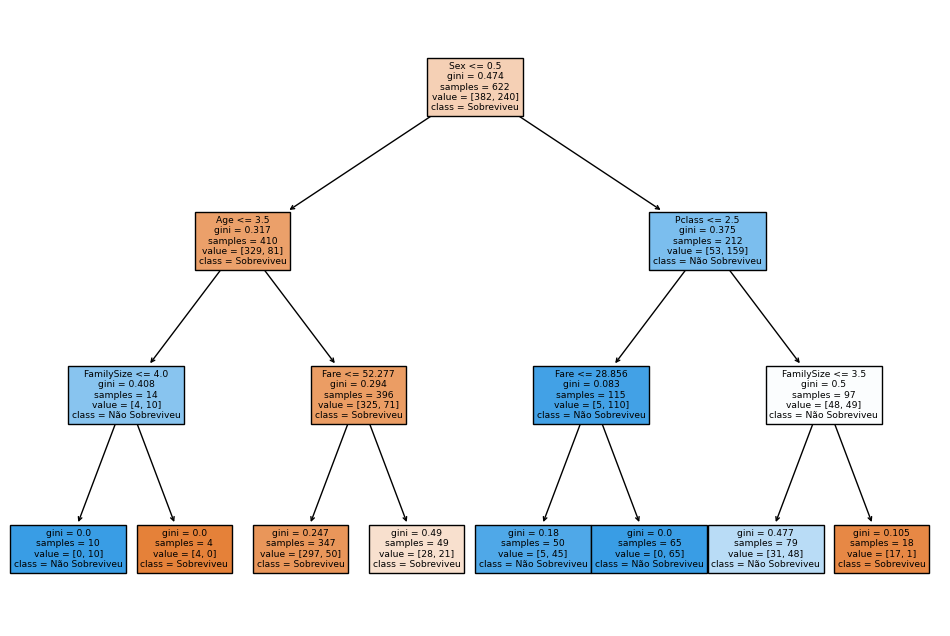

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Criar e treinar o  modelo
dtree = DecisionTreeClassifier(max_depth=3, random_state=42) 
dtree.fit(X_train, y_train)         

# Avaliar modelo
y_pred_tree = dtree.predict(X_test)
print('Tree Accuracy: ', accuracy_score(y_test,y_pred_tree))

# Gráfico
plt.figure(figsize=(12,8))
plot_tree(dtree, feature_names=X.columns, class_names=['Sobreviveu', 'Não Sobreviveu'], filled=True)
plt.show()

## Conclusões do Modelo de Árvore de Decisão



### **1. Género (`Sex`)**
- **`Sex`** é a variável mais importante no topo da árvore.
- Passageiros **do sexo feminino** têm uma probabilidade significativamente maior de sobreviver do que passageiros do sexo masculino.


### **2. Idade (`Age`)**
- Passageiros **com idade menor ou igual a 3.5 anos** (crianças) têm uma alta probabilidade de sobrevivência.
- Esta conclusão reflete a regra "mulheres e crianças primeiro" aplicada no Titanic.



### **3. Classe de Passageiro (`Pclass`)**
- Passageiros da **1ª classe** têm maior probabilidade de sobrevivência.
- Passageiros da **3ª classe** têm uma probabilidade muito menor de sobreviver, especialmente se também forem do sexo masculino.



### **4. Bilhete (`Fare`)**
- Entre os passageiros adultos, aqueles que pagaram **bilhetes mais altos (Fare > 52.277)** têm maior probabilidade de sobrevivência.
- Passageiros que compraram bilhetes de mais baixo valor têm maior probabilidade de não sobreviver.



### **5. Tamanho da Família (`FamilySize`)**
- Passageiros com **famílias pequenas ou médias (FamilySize <= 4)** têm uma probabilidade de sobrevivência maior.
- Famílias grandes (FamilySize > 3.5) apresentam maior probabilidade de não sobrevivência.



### **6. Interações observadas**
- **Crianças pequenas com famílias menores** têm uma probabilidade quase garantida de sobrevivência.
- Passageiros adultos na **3ª classe**, mesmo com bilhetes de valor médio, ainda enfrentam uma probabilidade baixa de sobrevivência.



### **Conclusões Gerais**
- O modelo confirma que **fatores sociais e económicos**, como **sexo, idade, classe de passageiro**, e **bilhete pago**, desempenharam papéis críticos na sobrevivência.
- Passageiros do sexo feminino, crianças e aqueles da 1ª classe com tarifas mais altas tiveram tratamento prioritário durante o resgate.
- Passageiros do sexo masculino e da 3ª classe enfrentaram maior risco de mortalidade.


In [37]:
from ipywidgets import interact, widgets

# Função para prever sobrevivência
def prever_sobrevivencia(pclass, sexo, idade, fare, embarked, family_size, is_alone):
    # Criar o input exatamente com as features esperadas pelo modelo
    input_data = pd.DataFrame([[
        pclass,                          # Pclass
        1 if sexo == 'Feminino' else 0, # Sex
        idade,                           # Age
        fare,                            # Fare
        1 if embarked == 'C' else 0,     # Embarked_C
        1 if embarked == 'Q' else 0,     # Embarked_Q
        1 if embarked == 'S' else 0,     # Embarked_S
        family_size,                     # FamilySize
        1 if is_alone == 'Sim' else 0    # IsAlone
    ]], columns=['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C', 
                 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone'])
    
    # Fazer a previsão
    previsao = dtree.predict(input_data)[0]
    
    # Mostrar o resultado
    print("=== Resultado da Previsão ===")
    if previsao == 1:
        print("🎉 Sobrevivência provável!")
    else:
        print("😞 Não sobreviveria.")

# Widgets interativos
interact(prever_sobrevivencia,
         pclass=widgets.IntSlider(min=1, max=3, step=1, value=2, description='Classe'),
         sexo=widgets.RadioButtons(options=['Masculino', 'Feminino'], description='Género'),
         idade=widgets.IntSlider(min=0, max=80, step=1, value=30, description='Idade'),
         fare=widgets.FloatSlider(min=0, max=300, step=1, value=20, description='Tarifa'),
         embarked=widgets.RadioButtons(options=['C', 'Q', 'S'], description='Embarque'),
         family_size=widgets.IntSlider(min=0, max=10, step=1, value=1, description='Tamanho Família'),
         is_alone=widgets.RadioButtons(options=['Sim', 'Não'], description='Viajou Sozinho?'));


interactive(children=(IntSlider(value=2, description='Classe', max=3, min=1), RadioButtons(description='Género…